## LGBM & XGBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.feature_selection import f_classif,chi2

In [2]:
df=pd.read_csv('diabetes (1).csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
### missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


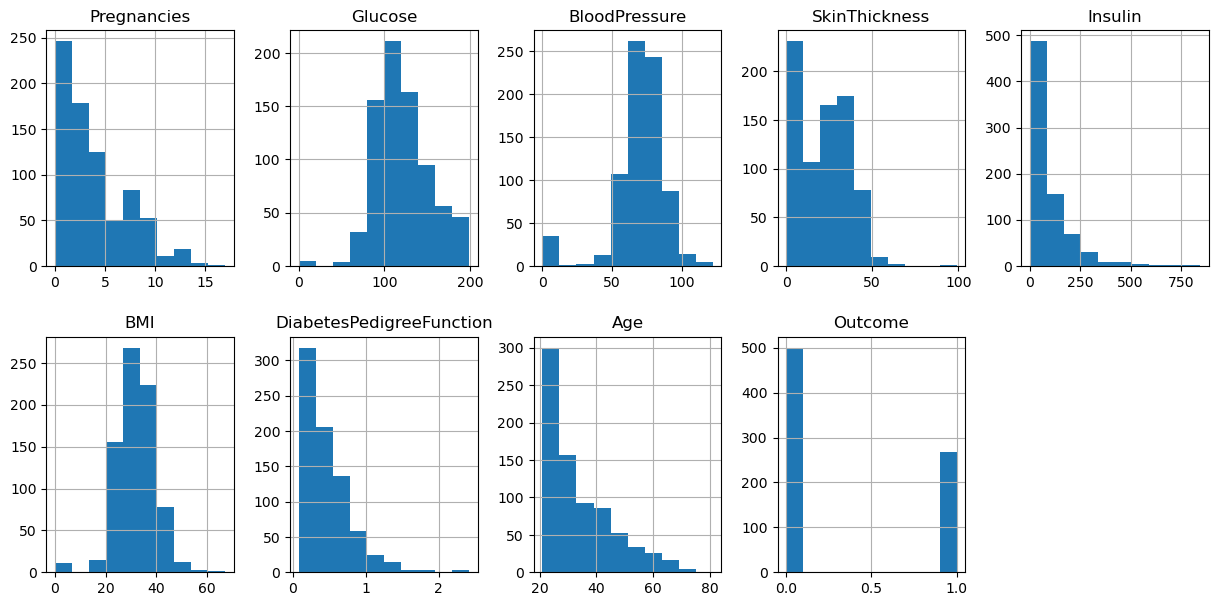

In [9]:
### histogram
df.hist(figsize=(15,15), layout=(4,5))
plt.show()

In [10]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


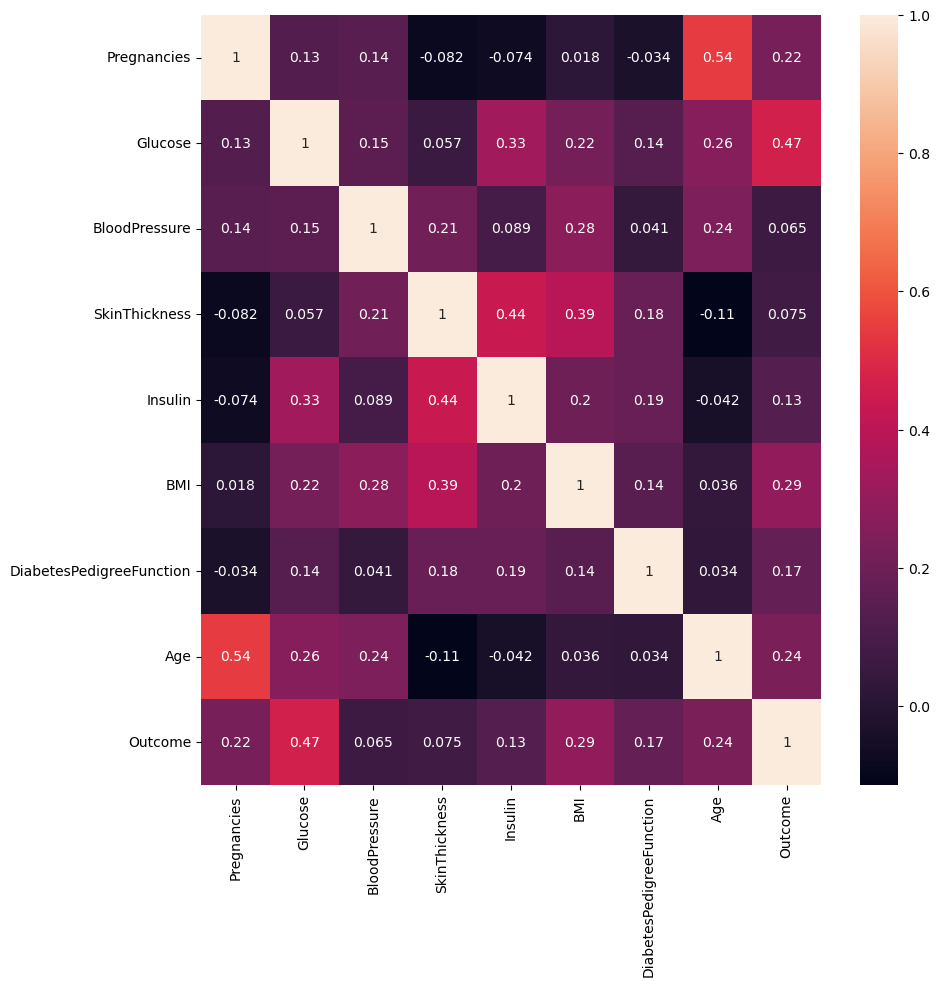

In [11]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

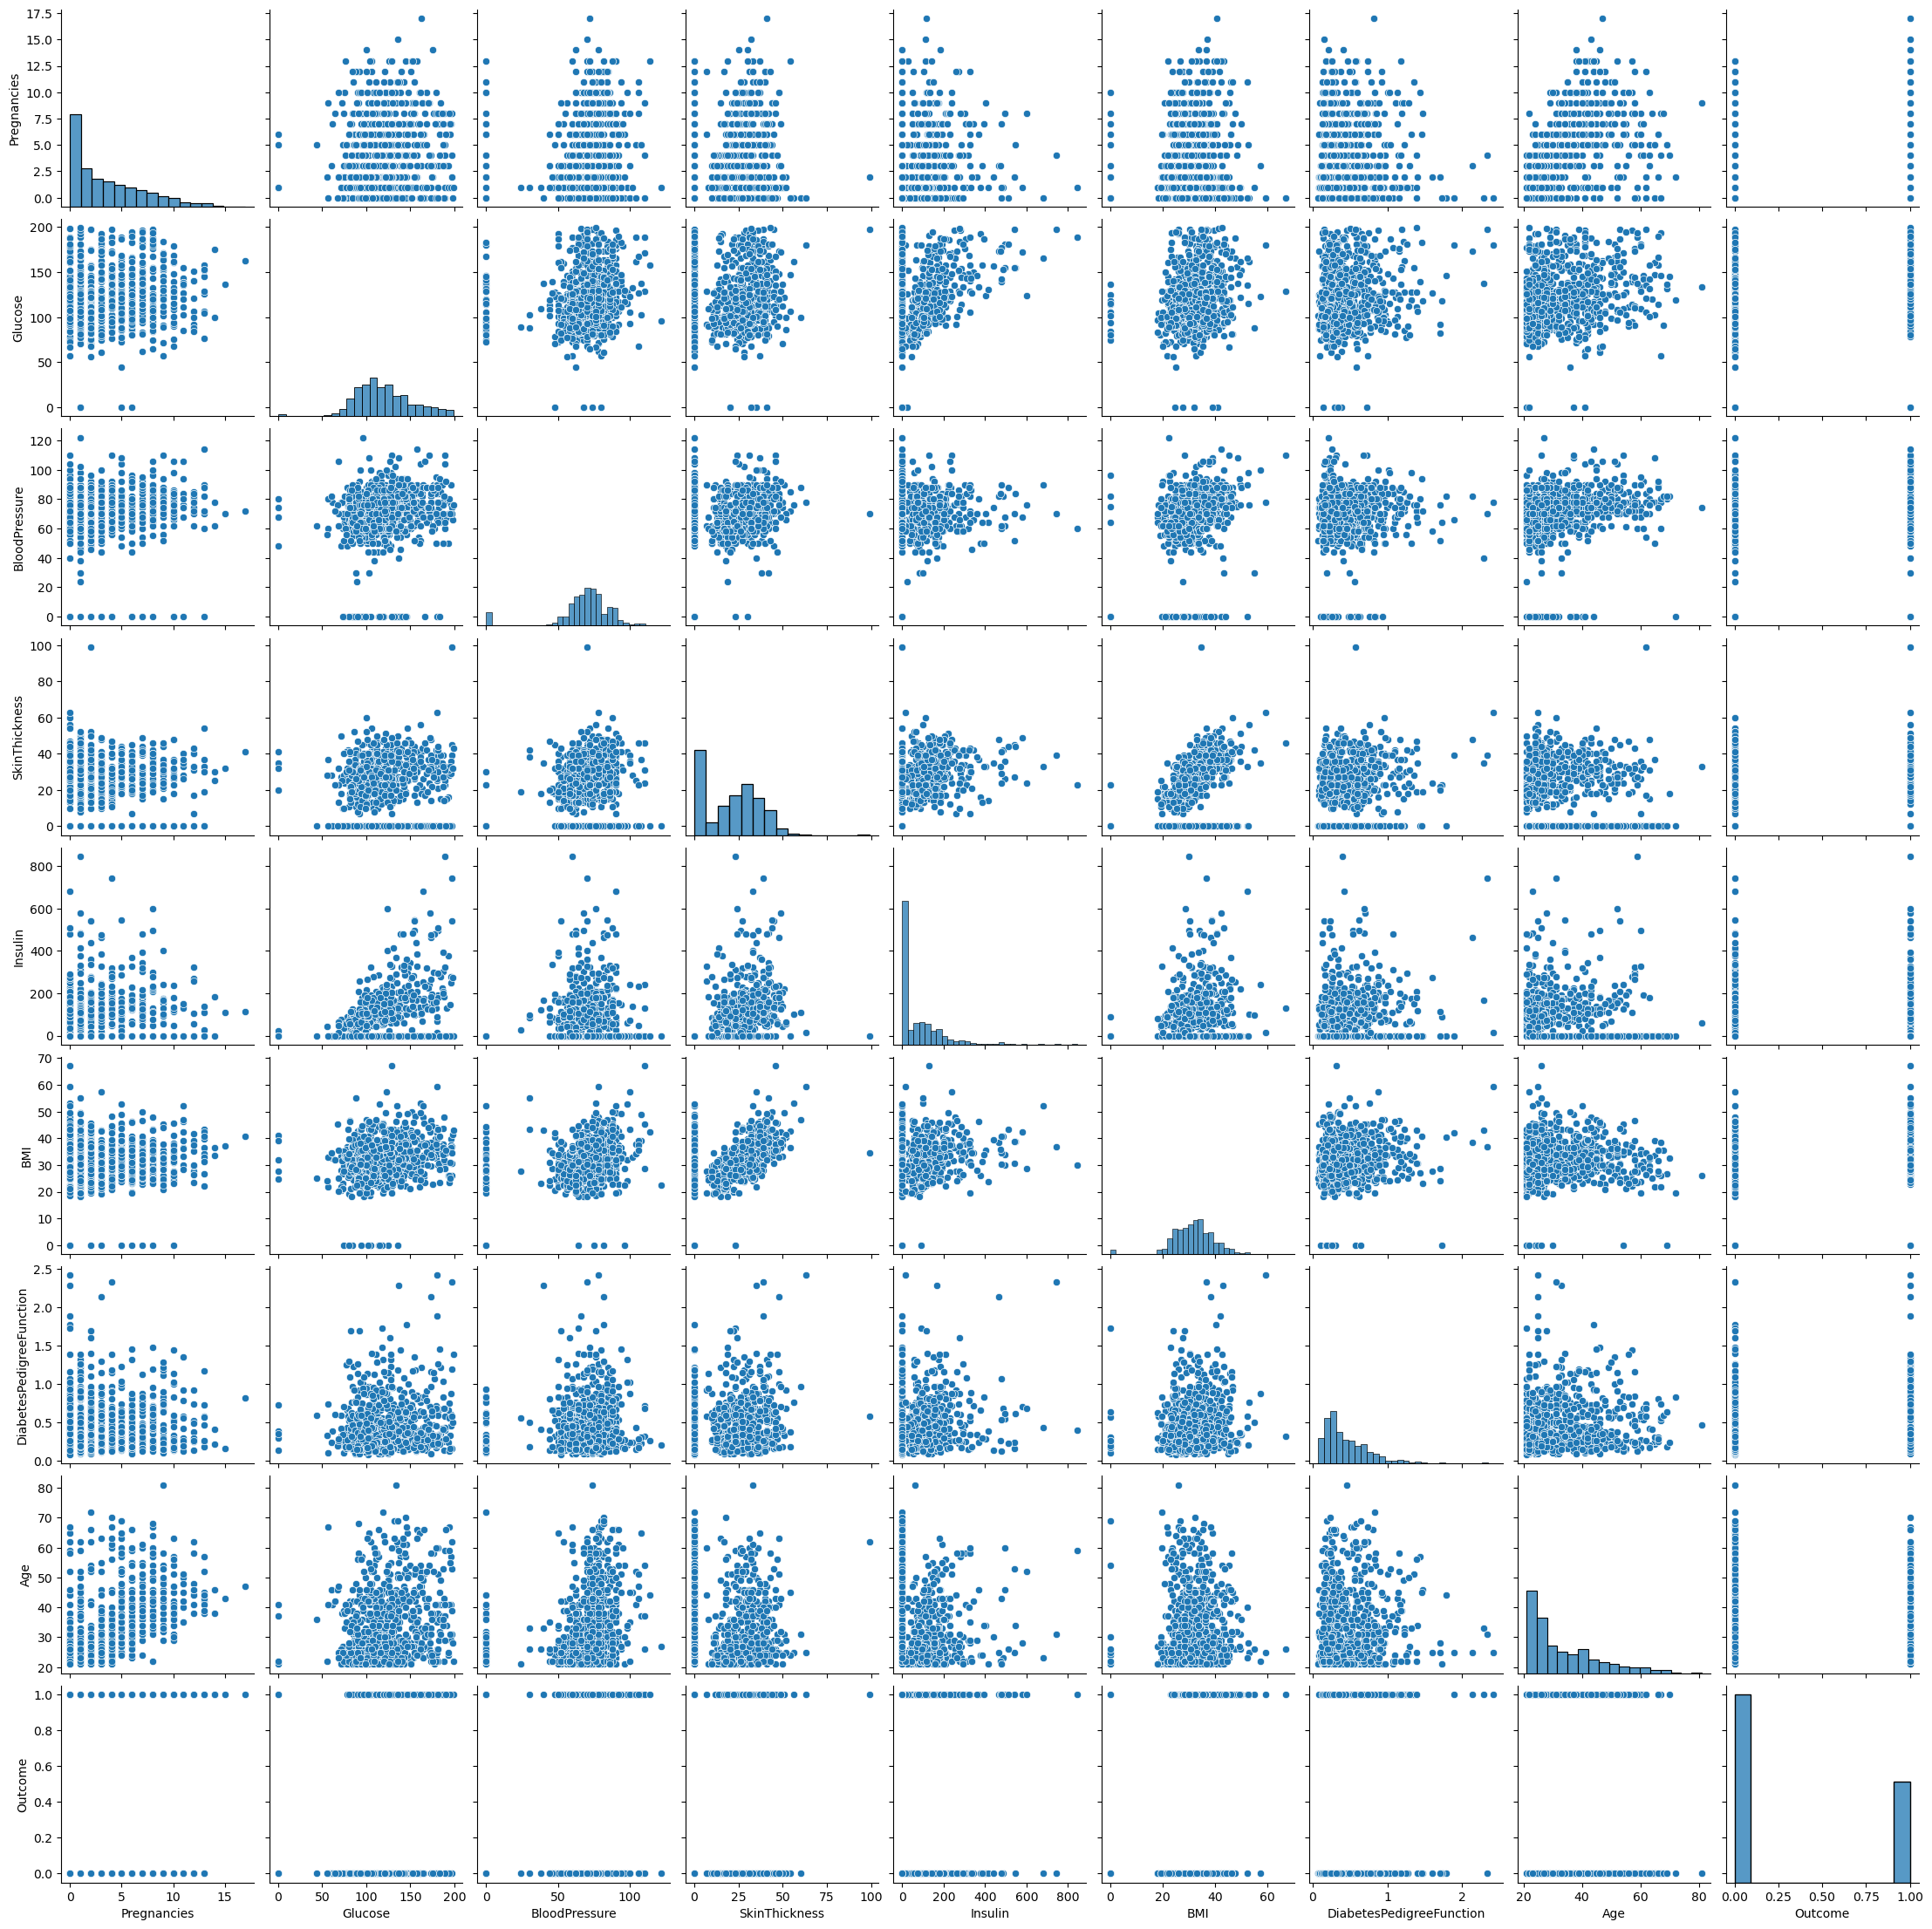

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
target=df[['Outcome']]
features= df.drop(columns=['Outcome'])
features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

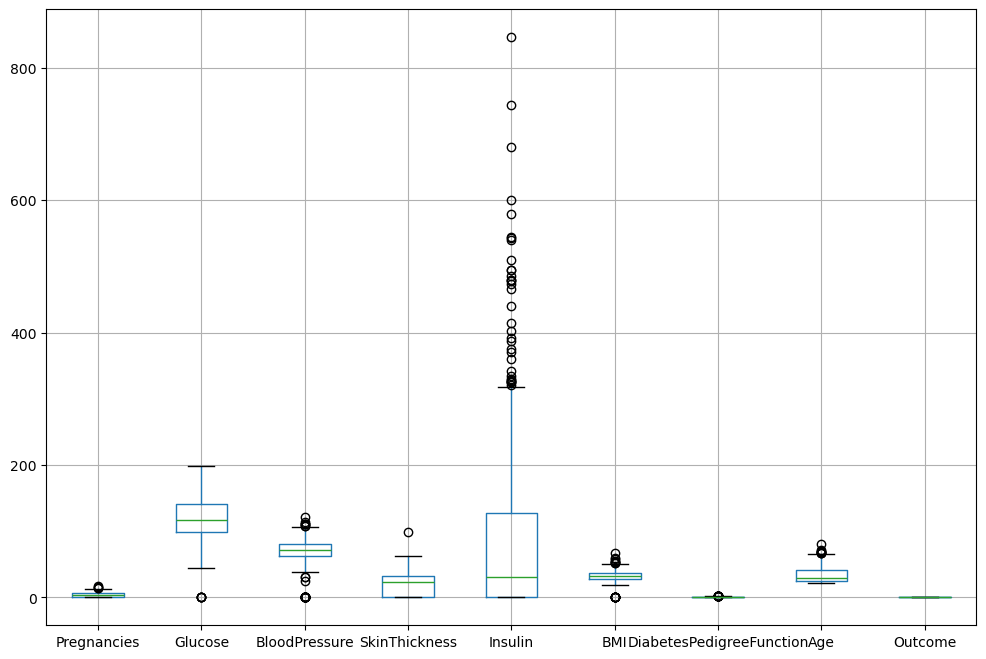

In [14]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.show()

In [15]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

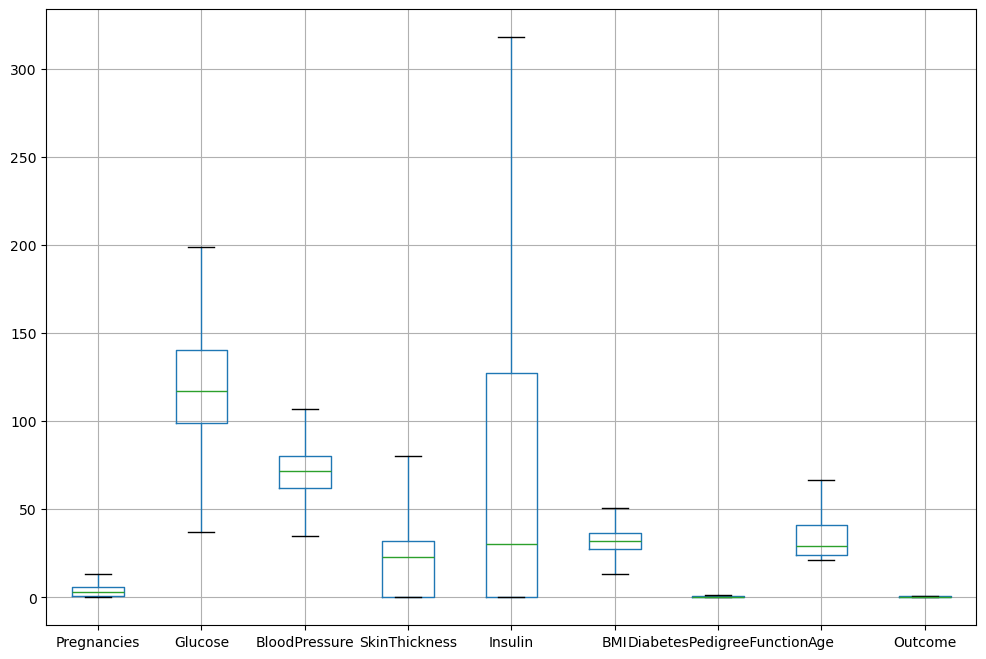

In [16]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.show()

In [17]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576, 1)
(192, 1)


In [18]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [19]:
from lightgbm import LGBMClassifier                                             
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
### model fitting
lgbm= LGBMClassifier()                                                         
lgbm.fit(x_train,y_train)

  File "C:\Users\saksh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\saksh\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\saksh\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\saksh\anaconda3\Lib\subprocess.

[LightGBM] [Info] Number of positive: 203, number of negative: 373
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352431 -> initscore=-0.608372
[LightGBM] [Info] Start training from score -0.608372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [21]:
y_pred=lgbm.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [22]:
confusion_matrix(y_test,y_pred)

array([[102,  25],
       [ 33,  32]])

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       127
           1       0.56      0.49      0.52        65

    accuracy                           0.70       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.69      0.70      0.69       192



In [24]:
### 72% accuracy is there and it is good

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

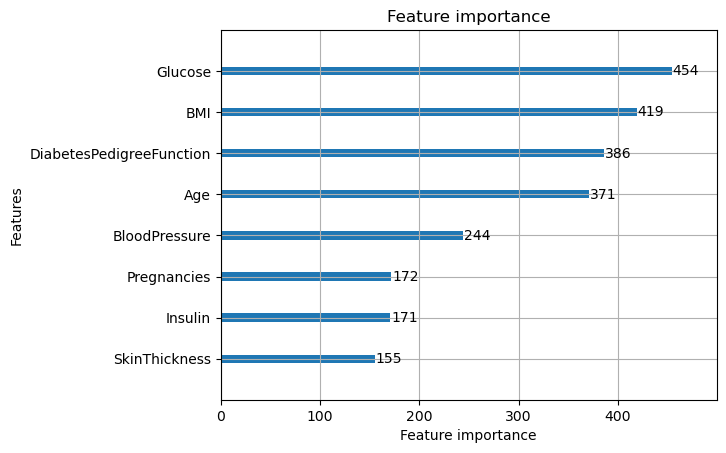

In [25]:
import lightgbm as lgb
lgb.plot_importance(lgbm)

In [26]:
from xgboost import XGBClassifier                               
# extra gradient boosting algorithm importing
xgb=XGBClassifier()                                          
xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [27]:
y_pred1=xgb.predict(x_test)
y_pred1

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [28]:
confusion_matrix(y_test,y_pred1)

array([[102,  25],
       [ 31,  34]])

In [29]:
print(classification_report(y_test,y_pred1)) 

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       127
           1       0.58      0.52      0.55        65

    accuracy                           0.71       192
   macro avg       0.67      0.66      0.67       192
weighted avg       0.70      0.71      0.70       192



In [30]:
# Define hyperparameter grid
xgb_params={
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.1],
    'max_depth':[3,5],
    'subsample':[0.8,1.0]
}

In [31]:
# Setup cross-validation strategy
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# Grid Search
grid_xgb=GridSearchCV(estimator=xgb,
                        param_grid=xgb_params,
                        cv=cv,
                        scoring='accuracy',
                        verbose=1,
                        n_jobs=-1)

In [32]:
# Fit
grid_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200], 'subsample': [0.8, 1.0]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [33]:
# Best params & score
print("Best XGBoost Params:",grid_xgb.best_params_)
print("Best CV Accuracy:",grid_xgb.best_score_)

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.7846626686656671


In [34]:
# Predict
y_pred_xgb = grid_xgb.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,y_pred_xgb))

Test Accuracy: 0.734375


In [35]:
#LGBM Classifier
# Define hyperparameter grid
lgb_params={
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, -1],
    'num_leaves': [31, 50]
}

In [36]:
# Grid Search
grid_lgb=GridSearchCV(estimator=lgbm,
                        param_grid=lgb_params,
                        cv=cv,
                        scoring='accuracy',
                        verbose=1,
                        n_jobs=-1)

In [37]:
# Fit
grid_lgb.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 203, number of negative: 373
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352431 -> initscore=-0.608372
[LightGBM] [Info] Start training from score -0.608372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,estimator,LGBMClassifier()
,param_grid,"{'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200], 'num_leaves': [31, 50]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [38]:
# Best params & score
print("Best LightGBM Params:",grid_lgb.best_params_)
print("Best CV Accuracy:",grid_lgb.best_score_)

Best LightGBM Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 31}
Best CV Accuracy: 0.7742728635682158


In [39]:
# Predict
y_pred_lgb = grid_lgb.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,y_pred_lgb))

Test Accuracy: 0.7291666666666666


In [40]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [41]:
# Probabilities for ROC AUC
y_proba_lgb = grid_lgb.predict_proba(x_test)[:, 1]
y_proba_xgb = grid_xgb.predict_proba(x_test)[:, 1]

In [42]:
# Metrics
metrics = {
    "Model": ["LightGBM","XGBoost"],
    "Accuracy": [
        accuracy_score(y_test,y_pred),
        accuracy_score(y_test,y_pred1)
    ],
    "Precision": [
        precision_score(y_test,y_pred_lgb),
        precision_score(y_test,y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test,y_pred_lgb),
        recall_score(y_test,y_pred_xgb)
    ],
    "F1-score": [
        f1_score(y_test,y_pred_lgb),
        f1_score(y_test,y_pred_xgb)
    ],
    "ROC AUC": [
        roc_auc_score(y_test,y_proba_lgb),
        roc_auc_score(y_test,y_proba_xgb)
    ]
}

In [43]:
display(metrics)

{'Model': ['LightGBM', 'XGBoost'],
 'Accuracy': [0.6979166666666666, 0.7083333333333334],
 'Precision': [0.6140350877192983, 0.6206896551724138],
 'Recall': [0.5384615384615384, 0.5538461538461539],
 'F1-score': [0.5737704918032787, 0.5853658536585366],
 'ROC AUC': [0.7636583888552393, 0.7720169594185342]}

In [44]:
# since there are no much difference in the result of the original dataset and hyperparametrized tuned dataset, we can proceed with th original dataset for model development
     

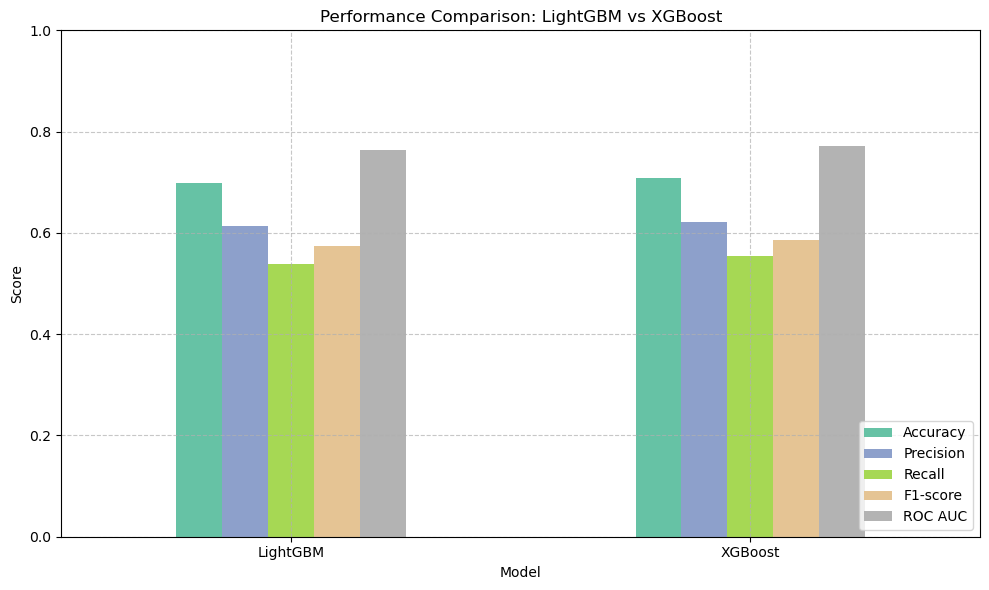

In [45]:
# Convert to DataFrame
df_metrics = pd.DataFrame(metrics).set_index("Model")
# Bar Plot
df_metrics.plot(kind='bar',figsize=(10, 6),colormap='Set2')
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--',alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

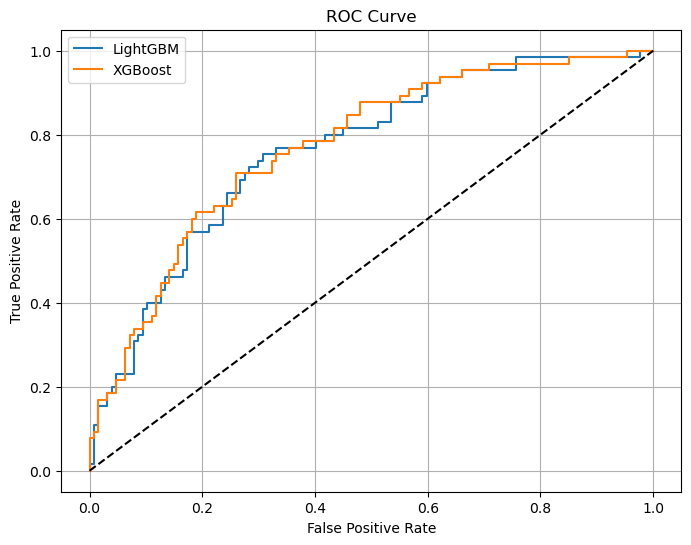

In [46]:
 # ROC curve
from sklearn.metrics import roc_curve                                   
fpr_lgb, tpr_lgb, _=roc_curve(y_test,y_proba_lgb)
fpr_xgb, tpr_xgb, _=roc_curve(y_test,y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
### XGBoost seems to have a slight performance advantage over LightGBM .
### The curves are close, indicating both models are performing similarly well in terms of balancing true positives and false positives